## 0. 라이브러리

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

# model,history save,load
import pickle

## 1. 모델, 가중치 로드

####  모델
- no_aug_resnet50 : 증강X
- aug_resnet50 : &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 증강O
- no_aug_cutmix_resnet50 : 증강X cutmixO
- aug_cutmix_resnet50: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 증강O cutmixO
- no_aug_mixup_resnet50 : 증강X mixupO
- aug_mixup_resnet50 : &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 증강O mixupO
- aug_cutmix_mixup_resnet50 : 증강O cutmixO mixupO

#### 가중치
- history_no_aug_resnet50 : no_aug_resnet50
- history_aug_resnet50 :  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; aug_resnet50
- history_no_aug_cutmix_resnet50 : no_aug_cutmix_resnet50
- history_aug_cutmix_resnet50 :  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; aug_cutmix_resnet50
- history_no_aug_mixup_resnet50 : no_aug_mixup_resnet50
- history_aug_mixup_resnet50 :  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; aug_mixup_resnet50
- history_aug_cutmix_mixup_resnet50 : aug_cutmix_mixup_resnet50

In [12]:
drive_path = '/aiffel/aiffel/aiffel_quest/GoingDeeper/Quest2/models/'

# 모델 불러오기
no_aug_resnet50 = tf.keras.models.load_model(drive_path + 'no_aug_resnet50.h5')
aug_resnet50 = tf.keras.models.load_model(drive_path + 'aug_resnet50.h5')
no_aug_cutmix_resnet50 = tf.keras.models.load_model(drive_path + 'no_aug_cutmix_resnet50.h5')
aug_cutmix_resnet50 = tf.keras.models.load_model(drive_path + 'aug_cutmix_resnet50.h5')
no_aug_mixup_resnet50 = tf.keras.models.load_model(drive_path + 'no_aug_mixup_resnet50.h5')
aug_mixup_resnet50 = tf.keras.models.load_model(drive_path + 'aug_mixup_resnet50.h5')
# aug_cutmix_mixup_resnet50 = tf.keras.models.load_model(drive_path + 'aug_cutmix_mixup_resnet50.h5')

# 학습 기록 불러오기
with open(drive_path + 'history_no_aug_resnet50.pkl', 'rb') as f:
    history_no_aug_resnet50 = pickle.load(f)

with open(drive_path + 'history_aug_resnet50.pkl', 'rb') as f:
    history_aug_resnet50 = pickle.load(f)

with open(drive_path + 'history_no_aug_cutmix_resnet50.pkl', 'rb') as f:
    history_no_aug_cutmix_resnet50 = pickle.load(f)
    
with open(drive_path + 'history_aug_cutmix_resnet50.pkl', 'rb') as f:
    history_aug_cutmix_resnet50 = pickle.load(f)

with open(drive_path + 'history_no_aug_mixup_resnet50.pkl', 'rb') as f:
    history_no_aug_mixup_resnet50 = pickle.load(f)

with open(drive_path + 'history_aug_mixup_resnet50.pkl', 'rb') as f:
    history_aug_mixup_resnet50 = pickle.load(f)
    
# with open(drive_path + 'history_aug_cutmix_mixup_resnet50.pkl', 'rb') as f:
#     history_aug_mixup_resnet50 = pickle.load(f)

## 2. 최적의 val_loss에서 지표 비교
- 각 모델의 최적의 val_loss을 기준으로 한 epoch
    - val_loss : best val loss
    - val_acc : corresponding val acc
    - loss : corresponding loss
    - acc : corresponding acc

In [15]:
# 최고 val_loss와 해당 loss, acc, val_acc 및 해당 epoch를 추출하는 함수
def get_best_loss_metrics(history):
    best_val_loss = min(history['val_loss'])
    best_val_loss_epoch = history['val_loss'].index(best_val_loss)
    corresponding_loss = history['loss'][best_val_loss_epoch]
    corresponding_acc = history['accuracy'][best_val_loss_epoch]
    corresponding_val_acc = history['val_accuracy'][best_val_loss_epoch]
    return best_val_loss, best_val_loss_epoch, corresponding_loss, corresponding_acc, corresponding_val_acc

# 각 모델의 최고 val_loss와 해당 loss, acc, val_acc 및 해당 epoch를 저장할 딕셔너리
best_loss_metrics = {}

# 모델 학습 기록 딕셔너리
histories = {
    'No Augmentation': history_no_aug_resnet50,
    'Augmentation': history_aug_resnet50,
    'No Aug CutMix': history_no_aug_cutmix_resnet50,
    'Aug CutMix': history_aug_cutmix_resnet50,
    'No Aug MixUp': history_no_aug_mixup_resnet50,
    'Aug MixUp': history_aug_mixup_resnet50,
    'Aug Cut Mix' : history_aug_mixup_resnet50
}

# 각 모델의 최고 val_loss와 해당 loss, acc, val_acc 및 해당 epoch를 추출하여 딕셔너리에 저장
for name, history in histories.items():
    best_val_loss, epoch, loss, acc, val_acc = get_best_loss_metrics(history)
    best_loss_metrics[name] = {
        'epoch': epoch,
        'best_val_loss': best_val_loss,  
        'val_acc': val_acc,
        'loss': loss, 
        'acc': acc
    }

# 결과 출력
import pandas as pd
best_loss_metrics_df = pd.DataFrame(best_loss_metrics).T
best_loss_metrics_df

,epoch,best_val_loss,val_acc,loss,acc
No Augmentation,4.0,0.917210,0.737640,0.024894,0.999667
Augmentation,4.0,0.954918,0.730993,0.163399,0.965667
No Aug CutMix,5.0,1.102717,0.687966,2.278546,0.626083
Aug CutMix,9.0,1.038546,0.714902,2.141749,0.661833
No Aug MixUp,5.0,1.123524,0.688549,2.146980,0.745250
Aug MixUp,8.0,1.134984,0.687733,2.103825,0.754917
Aug Cut Mix,8.0,1.134984,0.687733,2.103825,0.754917


### 결과분석

cutmix와 mixup 등 **혼합 증강을 하지 않은 모델**의 경우 <u>epoch이 4일 때</u>, 최적의 val_loss를 가지고, <br>
**cutmix, mixup** 증강을 적용 한 모델은 **기본 증강이 없을 때**는 <u>epoch이 5</u>일 때, <br>
**기본 증강을 한경우** 각 <u>epoch이 9, 15</u>일 때로 더 많은 학습을 해야 수렴하는 모습을 보였다. <br> <br>
또한 cutmix와 mixup 등 **혼합 증강을 하지 않은 모델**의 경우에서 <u>더 높은 val_acc</u>를 보이며, <br>
**cutmix**을 적용한 모델이 **mixup**를 적용한 모델<u>보다 훈련 데이터에서 더 낮은 acc</u>를 보였다. <br><br>
이는 **cutmix**모델이 <u>더 많은 노이즈</u>를 받는다고 해석할 수 있다.

## 3.1 훈련과정 시각화 비교
- 위 표의 증강 순서대로 색 적용 (무지개)

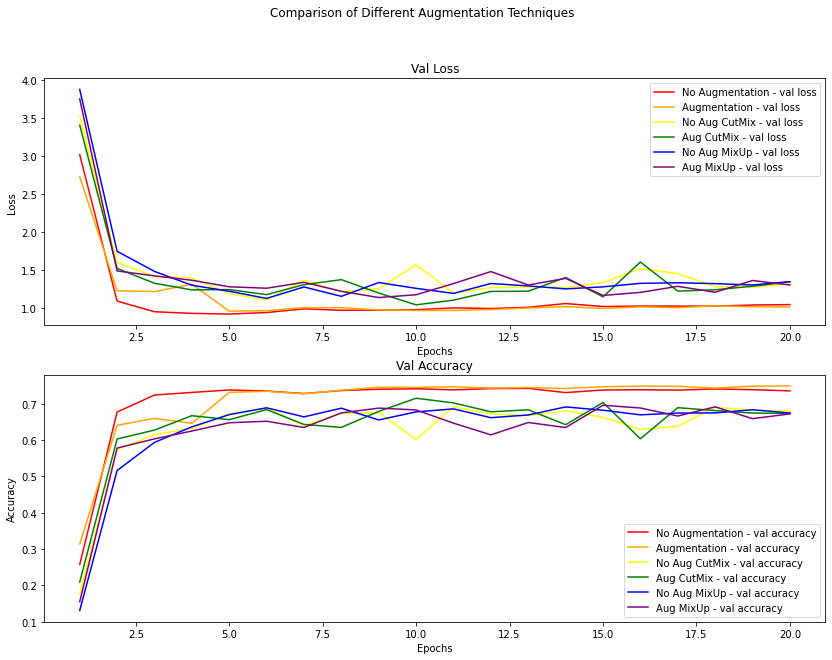

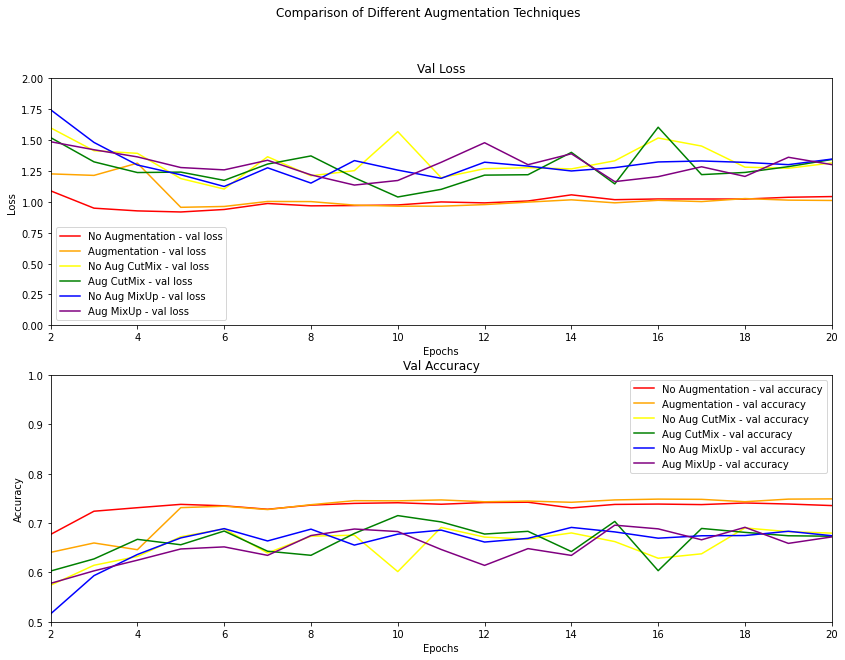

In [17]:
def plot_history(histories, title):
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
    
    plt.figure(figsize=(14, 10))
    for (name, history), color in zip(histories.items(), colors):
        # 정확도 그래프
        plt.subplot(2, 1, 2)
        plt.plot(range(1, len(history['val_accuracy']) + 1), history['val_accuracy'], label=f'{name} - val accuracy', color=color)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Val Accuracy')
        plt.legend()
       
        
        # 손실 그래프
        plt.subplot(2, 1, 1)
        plt.plot(range(1, len(history['val_loss']) + 1), history['val_loss'], label=f'{name} - val loss', color=color)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Val Loss')
        plt.legend()
        
    plt.suptitle(title)
    plt.show()
    
    plt.figure(figsize=(14, 10))
    for (name, history), color in zip(histories.items(), colors):
        # 정확도 그래프
        plt.subplot(2, 1, 2)
        plt.plot(range(1, len(history['val_accuracy']) + 1), history['val_accuracy'], label=f'{name} - val accuracy', color=color)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Val Accuracy')
        plt.legend()
        plt.xlim(2, len(history['val_accuracy']))
        plt.ylim(0.5, 1)  # y축 범위 설정 (2.0 이하)
        
        # 손실 그래프
        plt.subplot(2, 1, 1)
        plt.plot(range(1, len(history['val_loss']) + 1), history['val_loss'], label=f'{name} - val loss', color=color)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Val Loss')
        plt.legend()
        plt.xlim(2, len(history['val_loss']))
        plt.ylim(0, 2.0)  # y축 범위 설정 (2.0 이하)
    plt.suptitle(title)
    plt.show()
    
# 모델 학습 기록 딕셔너리로 정리
histories = {
    'No Augmentation': history_no_aug_resnet50,
    'Augmentation': history_aug_resnet50,
    'No Aug CutMix': history_no_aug_cutmix_resnet50,
    'Aug CutMix': history_aug_cutmix_resnet50,
    'No Aug MixUp': history_no_aug_mixup_resnet50,
    'Aug MixUp': history_aug_mixup_resnet50
}

plot_history(histories, 'Comparison of Different Augmentation Techniques')

### 결과분석
대체적으로 **혼합 증강**을 적용한 모델의 <u>성능이 낮아졌다.</u> <br>
이는 **cutmix**와 **mixup**을 적용한 것이나 적용하는 것에 문제가 있을 수 있다. <br><br>
먼저 **파라미터 설정의 문제**를 생각해 볼 수 있다. <br>
랜덤하게 설정한 `alpha`나 `cut_ratio`가 <u>너무 크거나 작게</u> 설정 되었을 수 있다. <br>
또한 랜덤하게 설정하면서 이미지의 <u>중요한 부분(ex:강아지 얼굴)등이 사라지거나</u>, <br> 
<u>중요도가 낮은 부분(ex: 배경)등이 추가</u>되며 중요한 특징을 파괴할 수 있다. <br><br>
더욱이 **라벨링이 잘못된 비율로 설정** 되었을 수 있다.

## 3.2 증강 방법 별 기본 증강 비교

- No Augmentation
- Augmentation
<br>

- No Aug CutMix
- Aug CutMix
<br>

- No Aug MixUp
- Aug MixUp

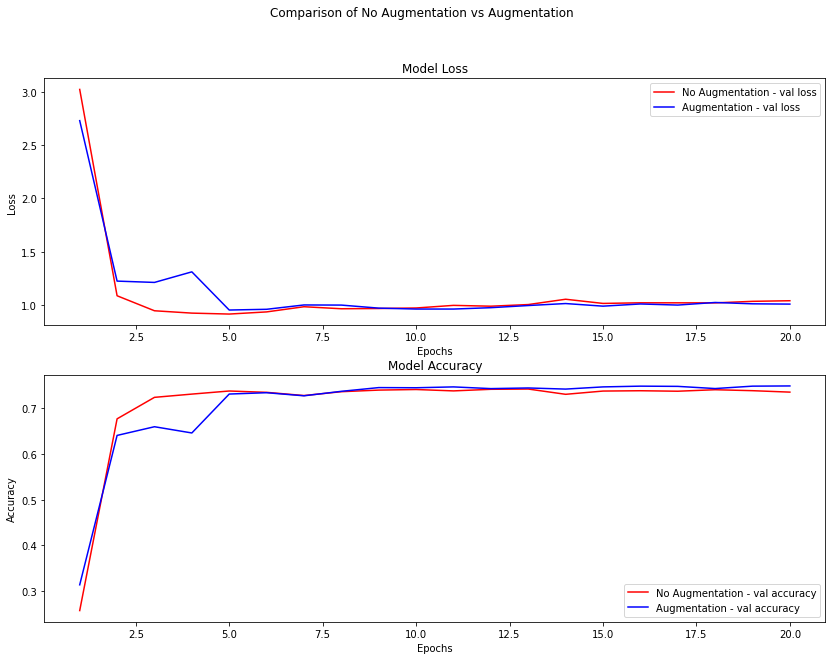

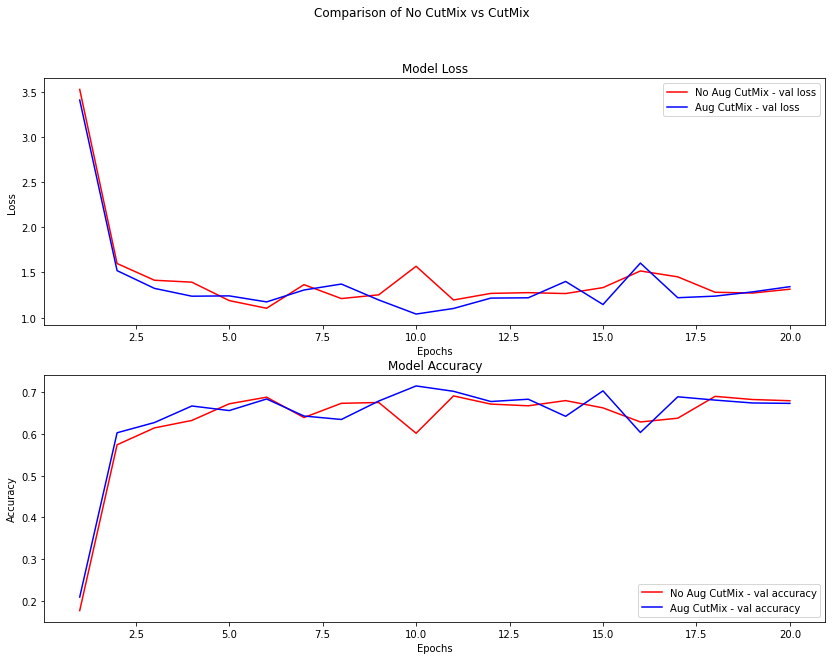

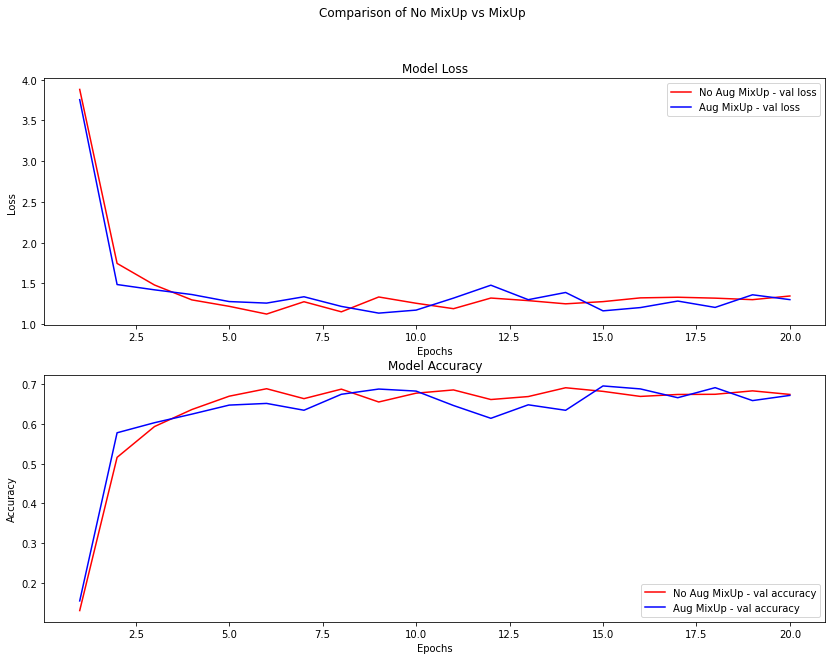

In [19]:
def plot_comparison(histories, title):
    colors = ['red', 'blue']
    plt.figure(figsize=(14, 10))

    max_epoch = max(len(history['val_accuracy']) for history in histories.values())

    for (name, history), color in zip(histories.items(), colors):
        # 정확도 그래프
        plt.subplot(2, 1, 2)
        plt.plot(range(1, len(history['val_accuracy']) + 1), history['val_accuracy'], label=f'{name} - val accuracy', color=color)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Model Accuracy')
        plt.legend()


        # 손실 그래프
        plt.subplot(2, 1, 1)
        plt.plot(range(1, len(history['val_loss']) + 1), history['val_loss'], label=f'{name} - val loss', color=color)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Model Loss')
        plt.legend()


    plt.suptitle(title)
    plt.show()

# Augmentation 비교
histories_aug = {
    'No Augmentation': history_no_aug_resnet50,
    'Augmentation': history_aug_resnet50
}
plot_comparison(histories_aug, 'Comparison of No Augmentation vs Augmentation')

# CutMix 비교
histories_cutmix = {
    'No Aug CutMix': history_no_aug_cutmix_resnet50,
    'Aug CutMix': history_aug_cutmix_resnet50
}
plot_comparison(histories_cutmix, 'Comparison of No CutMix vs CutMix')

# MixUp 비교
histories_mixup = {
    'No Aug MixUp': history_no_aug_mixup_resnet50,
    'Aug MixUp': history_aug_mixup_resnet50
}
plot_comparison(histories_mixup, 'Comparison of No MixUp vs MixUp')

### 결과 분석
기본 증강의 비교에서 증강을 적용하지 않은 모델이 더 빠르게 수렴했다. <br>
하지만 기본 증강을 적용한 것이 더 좋은 성능을 내는 것으로 보인다. <br>
혼합 증강의 경우 cutmix와 mixup 둘다 기본 증강을 적용했을 때 더 빠르게 수렴했다. <br>
또한 기본 증강을 적용한 것이 더 좋은 성능을 내는 것으로 보인다. <br><br>
기본 증강으로 적용한 좌우 반전, 밝기 조절이 데이터를 더 다양하게 늘려주는 것으로 해석된다.

## 3.3 같은 기본 증강 별 증강 방법 비교
- No Augmentation
    - No Aug CutMix
    - No Aug MixUp
<br>

- Augmentation
    - Aug CutMix
    - Aug MixUp

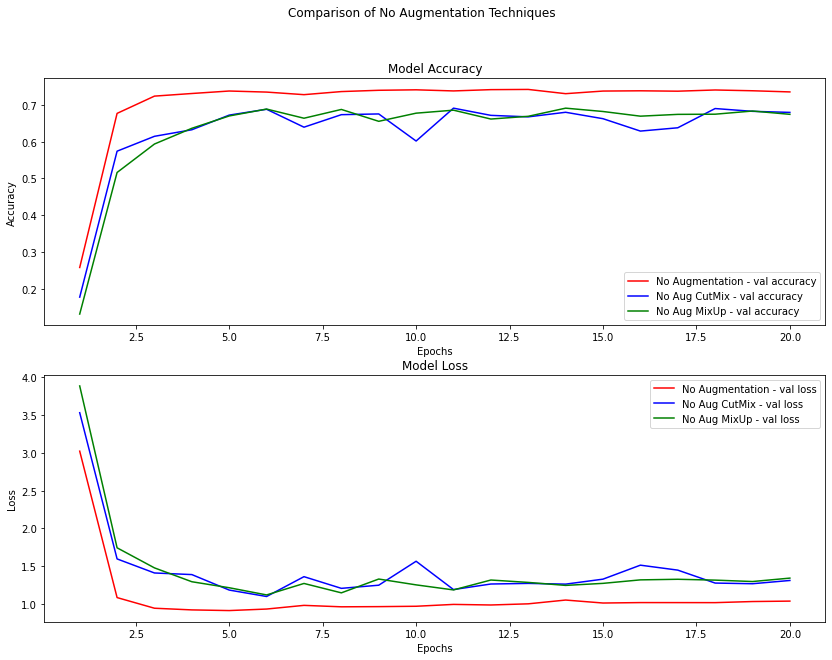

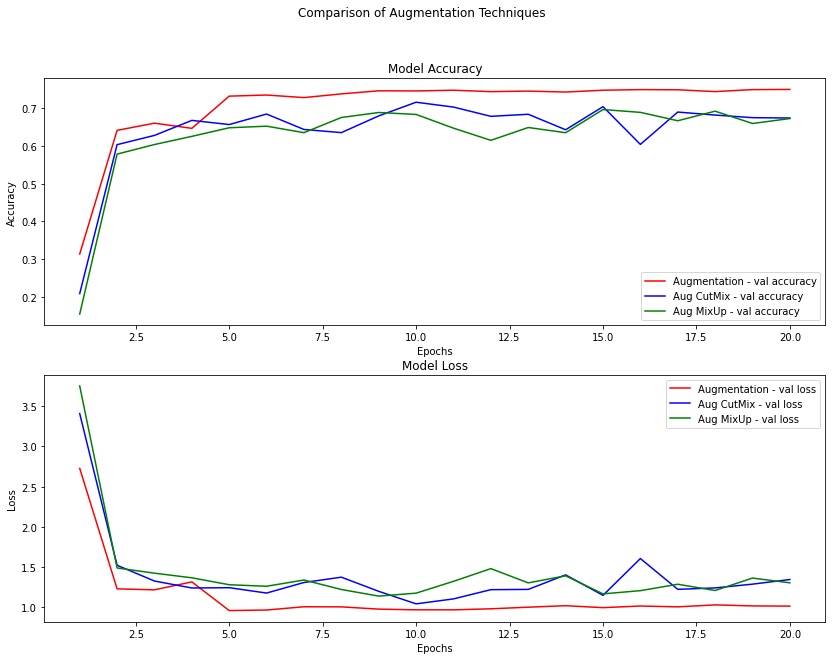

In [21]:
def plot_comparison(histories, title):
    colors = ['red', 'blue', 'green']
    plt.figure(figsize=(14, 10))

    max_epoch = max(len(history['val_accuracy']) for history in histories.values())

    for (name, history), color in zip(histories.items(), colors):
        # 정확도 그래프
        plt.subplot(2, 1, 1)
        plt.plot(range(1, len(history['val_accuracy']) + 1), history['val_accuracy'], label=f'{name} - val accuracy', color=color)
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Model Accuracy')
        plt.legend()

        # 손실 그래프
        plt.subplot(2, 1, 2)
        plt.plot(range(1, len(history['val_loss']) + 1), history['val_loss'], label=f'{name} - val loss', color=color)
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Model Loss')
        plt.legend()

    plt.suptitle(title)
    plt.show()

# No Augmentation 그룹 비교
histories_no_aug = {
    'No Augmentation': history_no_aug_resnet50,
    'No Aug CutMix': history_no_aug_cutmix_resnet50,
    'No Aug MixUp': history_no_aug_mixup_resnet50
}
plot_comparison(histories_no_aug, 'Comparison of No Augmentation Techniques')

# Augmentation 그룹 비교
histories_aug = {
    'Augmentation': history_aug_resnet50,
    'Aug CutMix': history_aug_cutmix_resnet50,
    'Aug MixUp': history_aug_mixup_resnet50
}
plot_comparison(histories_aug, 'Comparison of Augmentation Techniques')

### 결과 해석

기본 증강을 적용하지 않은 경우 cutmix가 mixup보다 빠르게 수렴하기 시작했다. <br>
기본 증강을 적용한 모델에서도 비슷한데, 이는 모델이 초반에는 cutmix를 더 잘 분류한다고 볼 수 있다. <br>
하지만 훈련을 거치며 cutmix와 mixup은 비슷한 성능을 내는 것 처럼 보인다. <br><br>

cutmix모델의 경우 1,2 그래프에서는 에폭10에서, 3,4 그래프에서는 에폭 16정도에서 급격하게 성능이 한번 씩 감소하는 특징이 있었다. <br>
같은 에폭에서 다른 두 모델은 이러한 점이 있지 않은 것으로 보아, 현재로서는 모델의 특이성이라고만 해석할 수 있을 것 같다.